### Prediction task is to determine whether a person makes over 50K a year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
adult_df=pd.read_csv(r"E:\Imarticus\Nikita Ma'am\Logistic Regression\Adult Dataset\adult_data.csv",header=None, delimiter=' *, *')
adult_df.head()

#header=None -> no columns names are present 
#delimiter=' *, *' -> this is a special kind of delimiter which remove all extra spaces 
#in my case the delimeter is , therefore i have used " *, *" if you have @ then write " *@ *"

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
adult_df.describe(include='all')  #including categorical variables

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## Pre-processing the data

In [6]:
# create a copy of the dataframe
adult_df_rev=pd.DataFrame.copy(adult_df) 

# making copy of dataset and using this copy for processing in case anything mesup 
# we dont need to load the dataset again you can just use original dataset

In [7]:
adult_df_rev.duplicated().sum()

24

In [8]:
adult_df_rev.drop_duplicates(inplace=True)  # keeps first value and drops other duplicate values
adult_df_rev.shape

(32537, 15)

## Feature Selection

In [9]:
# 1st doing feature selection that is dropping the columns and then handling missing values
adult_df_rev.drop(['education','fnlwgt'],axis=1,inplace=True)
adult_df_rev.shape

# No need of fnlwgt(final weight) column because this column does not convey meaningful infomation 
# also final weight is computed variable on the basis of age, race and sex 
# No need of education column because we have education_num they both give same information

(32537, 13)

##  Handling missing values

1. Detect missing values
2. Inform the client
3. Elimination -> dropping the data -> less then 15% data is missing -> dropna()

    OR 
    
   Treatment -> client's help default values -> ffil/bfil -> predict the values(splitting the data into training and testing i.e non-missing values in training data and all missing values in testing data which can be done using KNNImputer) -> measures of central tendency (mean and median = continous and no outliers, mode = discrete/categorical and outliers, median = continous and outliers)

In [10]:
adult_df_rev.isnull().sum() 

#There are missing values in my data in the form of ? 
#but it is not detecting so 1st converting this ? to null or NA value

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
adult_df_rev.dtypes

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [12]:
for i in adult_df_rev.columns:
    print({i:adult_df_rev[i].unique()})
    
#to check all unique values in each column

{'age': array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)}
{'workclass': array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)}
{'occupation': array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing'

**Here we can see that workclass, occupation and native_country columns has null values in the form of "?"**

In [13]:
adult_df_rev.replace('?',np.nan,inplace=True)

In [14]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [15]:
#replacing the missing values with mode values
for value in ['workclass','occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0], inplace=True)
    
#adult_df_rev[value].mode()[0] -> mode value for workclass column is private, mode value for 
#occupation column is Prof-specialty and mode value for native_country column is United-States

In [16]:
adult_df_rev.workclass.mode()[0]       # 'Private'
adult_df_rev.occupation.mode()[0]      # 'Prof-specialty'
adult_df_rev.native_country.mode()[0]  # 'United-States'

'United-States'

In [17]:
#Above logic for handling missing values for multiple variables 
"""
for x in dataset_name.columns:
    if dataset_name[x].dtype=='object' or dataset_name[x].dtype=='bool':
        dataset_name[x].fillna(dataset_name[x].mode()[0],inplace=True)
    elif dataset_name[x].dtype=='int64' or dataset_name[x].dtype=='float64':
        dataset_name[x].fillna(round(dataset_name[x].mean()),inplace=True)     #if there are outliers->median
"""

"\nfor x in dataset_name.columns:\n    if dataset_name[x].dtype=='object' or dataset_name[x].dtype=='bool':\n        dataset_name[x].fillna(dataset_name[x].mode()[0],inplace=True)\n    elif dataset_name[x].dtype=='int64' or dataset_name[x].dtype=='float64':\n        dataset_name[x].fillna(round(dataset_name[x].mean()),inplace=True)     #if there are outliers->median\n"

## Converting data from categorical to numerical

1. **Manual encoding** -> map(), reduce() -> eg. df.sex.replace({'F':0, 'M':1}, inplace = True) 

                    
2. **Dummy variables** -> pd.get_dummies() OR OneHotEncoder() 


3. **Creating levels** -> LabelEncoder()	

In [18]:
#dummy variable
adult_df_rev_new=pd.get_dummies(adult_df_rev, drop_first=True)
adult_df_rev_new.head()

#In our case we will not procced with get_dummies() because it gives large number of variables 
#we will proceed with adult_df_rev only 

#adult_df_rev_new.shape   # from 13 columns we are getting 82 columns

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
#creating levels
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [20]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
    
adult_df_rev.head()

# 0 ---> <=50K
# 1 ---> >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [21]:
""" only for understanding//

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print('Feature', x)
print('mapping', le_name_mapping)
""" 

" only for understanding//\n\nle_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))\nprint('Feature', x)\nprint('mapping', le_name_mapping)\n"

In [22]:
# creating levels for each variable (this approach mostly used in industry)
data={"Gender":["Female", "Male","Female"] }
df=pd.DataFrame(data)
print(df.head())
print()

le_gender=LabelEncoder()
df["Gender"]=le_gender.fit_transform(df["Gender"])
print(df.head())
print()

df["Gender"]=le_gender.inverse_transform(df["Gender"])
print(df.head())

   Gender
0  Female
1    Male
2  Female

   Gender
0       0
1       1
2       0

   Gender
0  Female
1    Male
2  Female


In [23]:
#creating x and y
x = adult_df_rev.values[:,0:-1]
y = adult_df_rev.values[:,-1]

print(x.shape)
print(y.shape)

#.value will return an array whereas .loc will return a df object
#arrays are ligher in weight which indirectly help the model to build faster

(32537, 12)
(32537,)


In [24]:
#scalling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)  
print(x)

#scale the x variable because there are 12 variables having different units 
#where as y has only 1 variable i.e data in one unit

[[ 0.03038995  2.62344898  1.13477712 ... -0.21674317 -0.03566374
   0.26113115]
 [ 0.8369732   1.72054053  1.13477712 ... -0.21674317 -2.22248299
   0.26113115]
 [-0.0429358  -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 ...
 [ 1.42357919 -0.08527638 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]
 [-1.2161478  -0.08527638 -0.42067868 ... -0.21674317 -1.65552985
   0.26113115]
 [ 0.9836247   0.81763207 -0.42067868 ... -0.21674317 -0.03566374
   0.26113115]]


In [25]:
#converting y to integer for avoiding error
y = y.astype(int)
print(y)

[0 0 0 ... 0 0 1]


In [26]:
#spliting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(22775, 12)
(22775,)
(9762, 12)
(9762,)


In [27]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [28]:
y_pred_prob = classifier.predict_proba(x_test)
y_pred_prob

# [probability of clas 0, probability of class 1] -> class having higher probability that class will be selected

array([[0.89035269, 0.10964731],
       [0.98760641, 0.01239359],
       [0.98078365, 0.01921635],
       ...,
       [0.87474272, 0.12525728],
       [0.97246196, 0.02753804],
       [0.87430819, 0.12569181]])

In [29]:
print(list(zip(y_test, y_pred)))   # when you want to manually compare actual vs predicted

#print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)
#print(classifier.coef_)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0),

In [69]:
#confussion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(y_test,y_pred))
 
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[7015  381]
 [1281 1085]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762

Accuracy of the model:  0.8297480024585125


**Evaluation of confusion matrix:** 

1. The size of confusion matrix depends on number of classification 
2. In our case we have binary classification i.e <=50K and >50K there fore the size of confusion matrix is 2*2

**Observation of classification report:**

1. The acual count of <=50K is 7396 and model predicted 7012 and 384 was mis-classified i.e it classifies as it falls under >50K
2. The acual count of >50K is 2366 and model predicted 1070 and 1296 was mis-classified i.e it classified as it falls under <=50K 
3. From confusion matric i can say for class 1 the misclassified count is more then classified count

**Observation:** 

1. Rather then seeing accuracy of model check for recall value of each class. Also recall value tell us wheather we need to tune our model or not. 
2. If your accuracy score is good then check for recall value o each classes if ur recall values are good then go ahead with that model if any the class has less recall value then tune the model 
3. In our case recall value of class 0 is more then class 1 therefore we need to tune the model
4. In recall we see row wise metrix and in precision we see column wise metrix
5. Rather then adjusting precision, work on adjusting recall because as recall value increases precision is also adjusted hand-in-hand 

## Tunning

In [31]:
#Adjusting the threshold
y_pred_prob = classifier.predict_proba(x_test)
print(y_pred_prob)

#0.4
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.4:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(y_test, y_pred_class))

[[0.89035269 0.10964731]
 [0.98760641 0.01239359]
 [0.98078365 0.01921635]
 ...
 [0.87474272 0.12525728]
 [0.97246196 0.02753804]
 [0.87430819 0.12569181]]
[[6746  650]
 [1022 1344]]
Accuracy of the model:  0.8287236222085638
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7396
           1       0.67      0.57      0.62      2366

    accuracy                           0.83      9762
   macro avg       0.77      0.74      0.75      9762
weighted avg       0.82      0.83      0.82      9762



In [32]:
""" Adjusted threshold for 0.6

[[7187  209]
 [1533  833]]
Accuracy of the model:  0.8215529604589223
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7396
           1       0.80      0.35      0.49      2366

    accuracy                           0.82      9762
   macro avg       0.81      0.66      0.69      9762
weighted avg       0.82      0.82      0.79      9762

"""

' Adjusted threshold for 0.6\n\n[[7187  209]\n [1533  833]]\nAccuracy of the model:  0.8215529604589223\n              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      7396\n           1       0.80      0.35      0.49      2366\n\n    accuracy                           0.82      9762\n   macro avg       0.81      0.66      0.69      9762\nweighted avg       0.82      0.82      0.79      9762\n\n'

**Observation:** From above o.4 and 0.6 adjusted threshold, we can see that 0.4 is better tunning model then 0.6

In [33]:
#using loop for adjusting threshold
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1672  , type 2 error : 1022  , type 1 error: 650
Errors at threshold  0.41000000000000003 : 1657  , type 2 error : 1047  , type 1 error: 610
Errors at threshold  0.42000000000000004 : 1665  , type 2 error : 1077  , type 1 error: 588
Errors at threshold  0.43000000000000005 : 1662  , type 2 error : 1103  , type 1 error: 559
Errors at threshold  0.44000000000000006 : 1652  , type 2 error : 1127  , type 1 error: 525
Errors at threshold  0.45000000000000007 : 1648  , type 2 error : 1147  , type 1 error: 501
Errors at threshold  0.4600000000000001 : 1642  , type 2 error : 1174  , type 1 error: 468
Errors at threshold  0.4700000000000001 : 1649  , type 2 error : 1202  , type 1 error: 447
Errors at threshold  0.4800000000000001 : 1668  , type 2 error : 1241  , type 1 error: 427
Errors at threshold  0.4900000000000001 : 1667  , type 2 error : 1265  , type 1 error: 402
Errors at threshold  0.5000000000000001 : 1680  , type 2 error : 1296  , type 1 error: 384
Errors at

**Observation:** Always try to search for an optimum threshold where the overall error is minimum and the type-2 error is also lower

1. 0.46 is best threshold because total error for 0.46 is 1642 and type 2 error is 1174        
2. 0.45 is also best threshold because total error for 0.45 is 1648 and type 2 error is 1147  [ 6 ----> 27 ]

0.8613964871921356


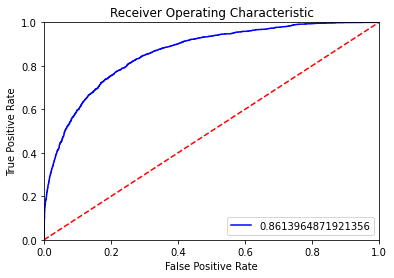

In [34]:
#when u r confused that which optimum threshold to select then use this area under curve logic
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1]) #take entire prob metrix rather than threshold value
auc = metrics.auc(fpr,tpr)
print(auc)
 
import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# auc -> 0.5 -> Worst model 
# auc -> 0.5 to 0.6 -> poor model 
# auc -> 0.6 to 0.7 -> bad model 
# auc -> 0.7 to 0.8 -> good model 
# auc -> 0.8 to 0.9 -> very good model 
# auc -> 0.9 to 1.0 -> excellent model 

0.740080996924613


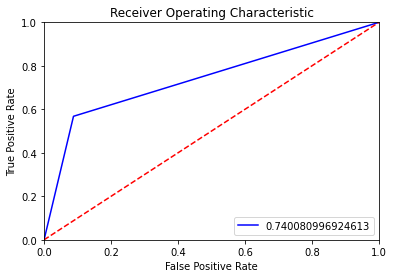

In [35]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_class) 
auc = metrics.auc(fpr,tpr)
print(auc)

import matplotlib.pyplot as plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**AUC:**

1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an highest AUC closest to the overall AUC.

eg. auc 0.43 -> 0.69
    
    auc 0.46 -> 0.72  -------------------> choose this model
    
    auc 0.47 -> 0.71

## Cross Validation

### 1. K-fold

In [36]:
# k-fold using logistic regression
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.81957858 0.82835821 0.82791923 0.81562774 0.82001756 0.82345191
 0.82345191 0.82784365 0.82301274 0.81774264]
0.8227004171577977


In [37]:
# This code block to be used only when we observed the drastic difference between accuracy of 
# k-fold v/s the base model accuracy

# model tuning -> if huge diff between the accuray of base model and accuracy of k-fold model
for train_value, test_value in kfold_cv.split(x_train, y_train):
    classifier.fit(x_train[train_value], y_train[train_value]).predict(x_train[test_value])
 
y_pred = classifier.predict(x_test)
#print(list(zip(y_test,y_pred)))

# No need to tune the model in our case because the accuracy of base model is good

In [38]:
# Confusion metrix using above tunning  
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(y_test, y_pred))

[[7007  389]
 [1293 1073]]
Accuracy of the model:  0.827699241958615
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.73      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



### 2. Stratified K-fold

In [39]:
# stratified k-fold using logistic regression
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=kfold_cv)
print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.82221247 0.82923617 0.82440737 0.81562774 0.81562774 0.81598595
 0.83662714 0.82608696 0.82476943 0.82301274]
0.8233593714755679


In [40]:
# model tuning -> if huge diff in accuracy og base model and stratified k-fold
for train_value, test_value in kfold_cv.split(x_train, y_train):
    classifier.fit(x_train[train_value], y_train[train_value]).predict(x_train[test_value])
 
y_pred = classifier.predict(x_test)

# Confusion metrix using above tunning  
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(y_test, y_pred))

[[7011  385]
 [1294 1072]]
Accuracy of the model:  0.8280065560335996
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.74      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



## Wrapper Method

### 1. Recursive Feature Elimination

1. All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model.
2. (X-1) variables will be considered and the model will be rebuilt.

The process continues till the time we are left off with the given no of variables in the model.
RFE model will be ready to predict upon the testing data. It follows an iterative process and hence consumes time. Deciding the number of feature to retain is try and error task


In [41]:
colname=adult_df_rev.columns

In [42]:
from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=8) #8 variables out of 12 independent variables

model_rfe = rfe.fit(x_train, y_train)

print("Num Features: ",model_rfe.n_features_) #variables retain -> TRUE and variables deleted -> FALSE
print("Selected Features: ")

print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) # 1 ->  

# model_rfe.n_features_ -> false values indicates that those values were eliminated 
# model_rfe.ranking_ -> the highest rank '5' indicates that native_country was eliminated in 1st iteration

Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


In [43]:
y_pred = model_rfe.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(y_test, y_pred))

[[7014  382]
 [1281 1085]]
Accuracy of the model:  0.8296455644335177
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



In [44]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_x=new_data.values[:,:-1]
new_y=new_data.values[:,-1]
print(new_x)
print(new_y)
"""
# In case the RFE eliminates logically relevant variables, create a  new df manually by subsetting 
# the variables derived from RFE as well as on the basis of domain knowledge.
# rest of the model building steps will have to be performed manually

"new_data=adult_df_rev[['age','workclass','occupation','sex','income']]\nnew_data.head()\nnew_x=new_data.values[:,:-1]\nnew_y=new_data.values[:,-1]\nprint(new_x)\nprint(new_y)\n"

### 2. Sequential Feature Selection

**SFS** is a **forward feature selection technique** which uses an iterative process where it starts with one best variable and keeps on adding one new variable in each iteration. It uses the CV process to generate accuracy at each iteration which helps us decide on the best combination of the variables we can then use this combination of variables to build a final model. 

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#Define Sequential Forward Selection (sfs) 
sffs = SFS(LogisticRegression(),
           k_features="best",
           forward=True,
           scoring = 'accuracy',
           cv = 5)

#Use SFS to select the top features 
feature_names=adult_df_rev.columns[:-1]
sffs.fit(x_train, y_train)
 
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

# model -> LogisticRegression()
# k_features="best" -> it will give list of all posible combination and you can select which is best 
# forward=True -> for forward selection -> forward=False works like recursive feature elimination
# scoring = 'accuracy' -> accuracy
# cv = 5 -> 5 fold cross validation

,feature_idx,cv_scores,avg_score,feature_names
1,"(8,)","[0.8008781558726674, 0.801536772777168, 0.8017...",0.799605,"(8,)"
2,"(8, 9)","[0.8059275521405049, 0.8182217343578485, 0.814...",0.811811,"(8, 9)"
3,"(1, 8, 9)","[0.8065861690450055, 0.8171240395170143, 0.814...",0.811592,"(1, 8, 9)"
4,"(1, 8, 9, 11)","[0.8052689352360044, 0.817563117453348, 0.8129...",0.81067,"(1, 8, 9, 11)"
5,"(1, 2, 8, 9, 11)","[0.8074643249176728, 0.8118551042810099, 0.814...",0.809308,"(1, 2, 8, 9, 11)"
6,"(1, 2, 5, 8, 9, 11)","[0.8162458836443469, 0.8239297475301867, 0.818...",0.818793,"(1, 2, 5, 8, 9, 11)"
7,"(1, 2, 5, 7, 8, 9, 11)","[0.8217343578485181, 0.8252469813391877, 0.822...",0.821603,"(1, 2, 5, 7, 8, 9, 11)"
8,"(1, 2, 5, 7, 8, 9, 10, 11)","[0.8151481888035126, 0.827661909989023, 0.8239...",0.82371,"(1, 2, 5, 7, 8, 9, 10, 11)"
9,"(0, 1, 2, 5, 7, 8, 9, 10, 11)","[0.8199780461031834, 0.8261251372118551, 0.825...",0.823754,"(0, 1, 2, 5, 7, 8, 9, 10, 11)"
10,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11)","[0.8206366630076839, 0.8287596048298573, 0.825...",0.824457,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11)"


In [46]:
# Creating x and y by taking high accuracy from above code block
x = adult_df_rev.values[:,[0, 1, 2, 5, 6, 7, 8, 9, 10, 11]]  # highest accuracy=0.8244 -> taking only those features
y = adult_df_rev.values[:,-1]

In [47]:
#scalling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)

x = scaler.transform(x)  

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [49]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(y_test, y_pred))

[[7051  345]
 [1313 1053]]
Accuracy of the model:  0.8301577545584922
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7396
           1       0.75      0.45      0.56      2366

    accuracy                           0.83      9762
   macro avg       0.80      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



# Filter Method

### 1. Chi-square

SelectKBest identify the chi2 values of every variables in the data and help us subset k highest value  chi-square variables this technique is suitable when we have more of categorical variables

In [51]:
x = adult_df_rev.values[:,:-1]
y = adult_df_rev.values[:,-1]

from sklearn.feature_selection import SelectKBest # Should be implemented on positive valued data so we should appleid on unscaled data by recreating x and y again
from sklearn.feature_selection import chi2        # When you have more categorical data 
 
test = SelectKBest(score_func=chi2, k=10)         # k=10 -> top 10 chi-square values
fit1 = test.fit(x, y)
 
colname=adult_df_rev.columns
print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))     # get_support() -> gives boolean list of values 
x_new = fit1.transform(x)

[8.59031713e+03 9.41445133e-02 2.39903589e+03 1.12172183e+03
 9.96668120e+01 3.65821506e+03 3.30121759e+01 5.01968535e+02
 8.21362443e+07 1.37062169e+06 6.46886542e+03 1.70998658e+01]
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]


In [52]:
#scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_new)
x = scaler.transform(x_new)

#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

#model building
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

#evaluating model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)
print(classification_report(y_test, y_pred))

[[7015  381]
 [1281 1085]]
Accuracy of the model:  0.8297480024585125
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      7396
           1       0.74      0.46      0.57      2366

    accuracy                           0.83      9762
   macro avg       0.79      0.70      0.73      9762
weighted avg       0.82      0.83      0.81      9762



### 2. Correlation

In [53]:
adult_df_rev.corr() # When you have more numerical data 

# correlation between all x variables should be low and there should be high correlation between x and y

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.040461,0.036224,-0.266137,0.001755,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.000659,0.234037
workclass,0.040461,1.000000,0.003503,-0.020430,0.007159,-0.057920,0.048349,0.071570,0.031506,0.002643,0.042200,-0.001669,0.002702
education_num,0.036224,0.003503,1.000000,-0.069161,0.070907,-0.094432,0.032011,0.012205,0.122664,0.079892,0.148422,0.088051,0.335272
marital_status,-0.266137,-0.020430,-0.069161,1.000000,0.034855,0.185532,-0.067930,-0.129402,-0.043368,-0.034140,-0.190432,-0.020885,-0.199199
occupation,0.001755,0.007159,0.070907,0.034855,1.000000,-0.037429,-0.004807,0.047648,0.018006,0.009653,-0.012849,-0.002136,0.034516
relationship,-0.263744,-0.057920,-0.094432,0.185532,-0.037429,1.000000,-0.116051,-0.582594,-0.057947,-0.061098,-0.248875,-0.010840,-0.250948
race,0.029116,0.048349,0.032011,-0.067930,-0.004807,-0.116051,1.000000,0.087472,0.011154,0.018913,0.041920,0.116850,0.071847
sex,0.088708,0.071570,0.012205,-0.129402,0.047648,-0.582594,0.087472,1.000000,0.048489,0.045571,0.229187,0.001751,0.215969
capital_gain,0.077676,0.031506,0.122664,-0.043368,0.018006,-0.057947,0.011154,0.048489,1.000000,-0.031639,0.078408,0.008777,0.223336
capital_loss,0.057745,0.002643,0.079892,-0.034140,0.009653,-0.061098,0.018913,0.045571,-0.031639,1.000000,0.054229,0.009335,0.150501


### 3. Variance Threshold

Variance Threshold identifies the variances of every variables in the data and based on the threshold provided it eliminate those variables which has less percentage of variance compare to the given threshold the default value for threshold is 0 which means it will eliminate the singular variable in that case

In [54]:
# recreating x and y because we want to apply on unscaled data 
x = adult_df_rev.values[:,:-1]    
y = adult_df_rev.values[:,-1]

from sklearn.feature_selection import VarianceThreshold  # works like eliminating singularality column 
vt = VarianceThreshold(0.3)    # if there is less then 10% varaity then eliminate that variable
fit1 = vt.fit(x, y)
print(fit1.variances_)
 
features = fit1.transform(x)
print(features.shape[1])
print(list(zip(adult_df_rev.columns,fit1.get_support())))

# After this you can go ahead with scalling, splitting, model building and evaluating model

[1.85988878e+02 1.22662712e+00 6.61309308e+00 2.26887148e+00
 1.57856209e+01 2.58257530e+00 7.20519181e-01 2.21358466e-01
 5.45802374e+07 1.62486094e+05 1.52440987e+02 3.66475626e+01]
11
[('age', True), ('workclass', True), ('education_num', True), ('marital_status', True), ('occupation', True), ('relationship', True), ('race', True), ('sex', False), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', True)]


## Testing adult data

In [55]:
#creating testing dataframe as adult_test
adult_test=pd.read_csv(r"E:\Imarticus\Nikita Ma'am\Logistic Regression\Adult Dataset\adult_test.csv",header=None, delimiter=' *, *')
adult_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [56]:
adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']
 
adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [57]:
adult_test.shape

(16281, 15)

In [58]:
#Data-preprocessing
adult_test.duplicated().sum() #Never delete duplicate records in the testing file 

5

In [59]:
#Feature selection
adult_test.drop(['education','fnlwgt'],axis=1,inplace=True)
adult_test.shape

(16281, 13)

In [60]:
#Handling the missing values
adult_test.isnull().sum() 

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [61]:
for i in adult_test.columns:
    print({i:adult_test[i].unique()})

{'age': array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87], dtype=int64)}
{'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)}
{'education_num': array([ 7,  9, 12, 10,  6, 15,  4, 13, 14, 16,  3, 11,  5,  8,  2,  1],
      dtype=int64)}
{'marital_status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)}
{'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tec

In [62]:
adult_test.replace('?',np.nan,inplace=True)

In [63]:
adult_test.isnull().sum()

age                 0
workclass         963
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [64]:
#replacing the missing values with mode values
for value in ['workclass','occupation','native_country']:
    adult_test[value].fillna(adult_test[value].mode()[0], inplace=True)

In [65]:
# Converting categorical values to numerical
colname=[]
for x in adult_test.columns:
    if adult_test[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [66]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    adult_test[x]=le.fit_transform(adult_test[x])
    
adult_test.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,3,7,4,6,3,2,1,0,0,40,37,0
1,38,3,9,2,4,0,4,1,0,0,50,37,0
2,28,1,12,2,10,0,4,1,0,0,40,37,1
3,44,3,10,2,6,0,2,1,7688,0,40,37,1
4,18,3,10,4,9,3,4,0,0,0,30,37,0


In [67]:
# Create x_test_new and y_test_new
x_test_new = adult_test.values[:,0:-1]
y_test_new = adult_test.values[:,-1]

print(x_test_new.shape)
print(y_test_new.shape)

(16281, 12)
(16281,)


In [68]:
# Scaling the data
x_test_new =scaler.transform(x_test_new)   # Never do fit() on test data
print(x_test_new)

# We fit the scaler object only on the training data and use the same object to transform both the
# training and the testing data We never fit it on test data because the mean & sd return by a test data
# could be different from the mean & sd from the train data and it could lead to inconsistent data after conversion
# i.e if u r using scaler.fit() in training data then don't do scaler.fit()
# again on testing data only do scaler.transform() in testing data

ValueError: X has 12 features, but StandardScaler is expecting 10 features as input.

In [ ]:
# predicting the model
y_pred_prob=classifier.predict_proba(x_test_new)
y_pred_prob

In [ ]:
# Use threshold=0.46(optimum) and generate y_pred_new
y_pred_new=[]
for value in y_pred_prob[:,1]:
    if value > 0.46:           #0.46
        y_pred_new.append(1)
    else:
        y_pred_new.append(0)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test_new,y_pred_new)
print(cfm)

acc=accuracy_score(y_test_new, y_pred_new)
print("Accuracy of the model: ",acc)

print("Classification report: ")
print(classification_report(y_test_new, y_pred_new))

In [ ]:
# Re-creating DataFrame to give to client
adult_test=pd.read_csv(r"E:\Imarticus\Nikita Ma'am\Logistic Regression\Adult Dataset\adult_test.csv",
                       header=None, delimiter=' *, *')

adult_test.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

In [ ]:
adult_test["Predictions"]=y_pred_new
adult_test.to_excel("output_adult_test.xlsx", header=True, index=False)